## Inclass Lab: Maximal Likelihood Estimate

We demonstrated random sampling and how it can be used in our class of scipy. Now we are going to demonstrate a typical way to build a statistical model given datasets, again with scipy. We first import the modules we will use, the only one we haven't seen before is `scipy.optimize`. We will explain it when using it.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

Let's consider an oversimplified situation:

Assume we collected a numerical data of length 10,000:


data = 

  <b>  | 0
-------|-------
0      |89.730955
1      |102.217494
2      |111.303901
3      |111.461852
4      | 94.072657
...    |...

and we want to find the **normal distribution** that best matches the data.

- **Exercise 1** The data is saved in data.csv, load it to you work space:

In [30]:
#### Your code here
data = pd.read_csv('./data.csv', header=None)
print(data.head())

            0
0   89.730955
1  102.217494
2  111.303901
3  111.461852
4   94.072657


Before we actaully deal with the normal distributions and the data, let's consider a simpler case.

- **Exercise 2** Create three normal distribution objects
    - standard normal distribution
    - mean = 0, standard deviation = 3
    - mean = 3, standard deviation = 1

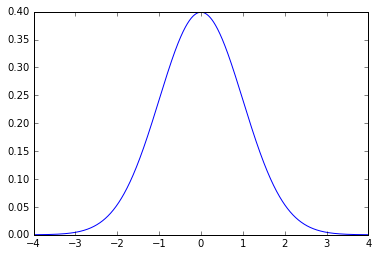

In [3]:
#### Your code here
norm_1 = stats.norm(0, 1)
norm_2 = stats.norm(0, 3)
norm_3 = stats.norm(3, 1)
z = np.linspace(-4,4,1000)
plt.plot(z,norm_1.pdf(z))

- **Exercise 3** Consider the dataseet with only one observation: `x = np.array([3])`. What do each model "says" about the observation? How do we compute it?

In [4]:
#### Your code here
x = np.array([3])
print(norm_1.pdf(x))
print(norm_2.pdf(x))
print(norm_3.pdf(x))

[ 0.00443185]
[ 0.08065691]
[ 0.39894228]


- **Demonstration**

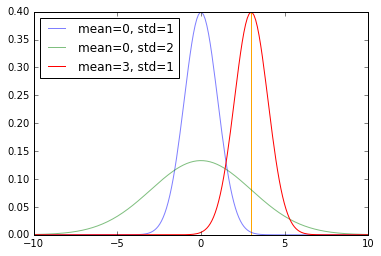

In [5]:
point = np.linspace(-10, 10, 200)
plt.plot(point, norm_1.pdf(point), label='mean=0, std=1', alpha=0.5)
plt.plot(point, norm_2.pdf(point), label='mean=0, std=2', alpha=0.5)
plt.plot(point, norm_3.pdf(point), label='mean=3, std=1')
plt.vlines(3, 0, 0.4, colors='orange')
plt.ylim(0, 0.4)
plt.legend(loc=2)

The yellow vertical line is not just an arbitrary line. It's actually the "histogram" of a dataset with only one observation.

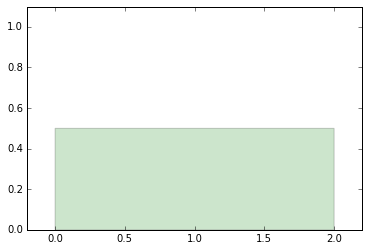

In [6]:
upb = 2    # Start from 1  
x = np.array([0, upb])
plt.hist(x, normed=True, bins=1, alpha=0.2, color='green')
plt.ylim(0,1.1)               # This one is for growing range
plt.xlim(-0.1*upb, 1.1*upb)   # This one is also for growing range
#plt.ylim(0,1.1/upb)          # This one is for shrinking range
#plt.xlim(-0.5, 1.5)          # This one is also for shrinking range
print

- **Exercise 4** Now consider a dataset with two observations: `x=np.array([-2, 2])`. Now:
    - Which model best fits `x=2`?
    - Which model best fits `x=-2`?
    - Which model is the best over all?

In [7]:
x=np.array([2])
#### Your code here
print(norm_1.pdf(x))
print(norm_2.pdf(x))
print(norm_3.pdf(x))

[ 0.05399097]
[ 0.10648267]
[ 0.24197072]


In [8]:
x=np.array([-2])
#### Your code here
print(norm_1.pdf(x))
print(norm_2.pdf(x))
print(norm_3.pdf(x))

[ 0.05399097]
[ 0.10648267]
[  1.48671951e-06]


In [9]:
x=np.array([-2,2])
#### Your code here
print(norm_1.pdf(x))
print(norm_2.pdf(x))
print(norm_3.pdf(x))

[ 0.05399097  0.05399097]
[ 0.10648267  0.10648267]
[  1.48671951e-06   2.41970725e-01]


** Exercise 5** Now we understand how **likelihood** is computed. Given a dataset $[x_1, x_2, ..., x_n]$ and a model, the likelihood is just:
<br/><br/>
$$
\text{model.pdf} (x_1) \times \text{model.pdf} (x_2) \times...\times \text{model.pdf} (x_n)
$$
<br/><br/>
Write this as a `likelihood` function to perform the computation, and then pass the model `norm_2` and the data below into it.
- `data = np.linspace(-3, 3, 2)`
- `data = np.linspace(-3, 3, 8)`
- `data = np.linspace(-3, 3, 20)`

Do you see some trend? Why does this happen?

In [19]:
#### Your code here
def likelhood (model,data):
    return np.prod(model.pdf(data))
print likelhood(norm_2,np.linspace(-3, 3, 2))

0.00650553683604


**Exercise 6** The trend we saw in **Exercise 5** will result in numerical error for large dataset. Therefore, instead of **likelihood** function, we need to implement **log_likelihood** function.

Given a dataset $[x_1, x_2, ..., x_n]$ and a model, the log likelihood is
<br/><br/>
$$
\text{log(model.pdf} (x_1)) + \text{log(model.pdf} (x_2)) +...+ \text{log(model.pdf} (x_n))
$$

Implement `log_likelihood`: 

In [21]:
#### Your code here
def log_likelhood (model,data):
    return np.sum(np.log(model.pdf(data)))
print log_likelhood(norm_2,np.linspace(-3, 3, 2))

-5.03510164375


**Exercise 7** It should be clear now that our goal is to find the model (why not data) that maximizes the log_likelihood function. That is to say, we want to find a `special_model` such that 
```python
log_likelihood(special_model, data) > log_likelihood(model, data)
```
for any other `model`.

However, to apply numerical method to find the argmax, the argument has to be numerical.

That is to say, we will not be able to optimize our `log_likelihood` if we need to pass a model into the function instead of numbers. 

To fix the problem, consider the three models we have:
```python
norm_1 = stats.norm(0, 1)
norm_2 = stats.norm(0, 2)
norm_3 = stats.norm(3, 1)
```

Instead of ontaining the log likelohood by
```python
log_likelihood(norm_1, data)
log_likelihood(norm_2, data)
log_likelihood(norm_3, data)
```

We should be able to rewrite the definition of the function so that we can obtain the log likelihood by
```python
log_likelihood(mu_1, std_1, data)
log_likelihood(mu_2, std_2, data)
log_likelihood(mu_3, std_3, data)
```

Implement the new `log_likelihood`:

In [26]:
#### Your code here
def log_likelihood(mu,std,data):
    return np.sum(np.log(stats.norm(mu, std).pdf(data)))

print log_likelihood(0,3,np.linspace(-3, 3, 2))

-5.03510164375


The code below use the submodule `scipy.optimize` maximize the log likelihood. Here are couple things to be noted:

- We actually used the **`minimize`** function to minimize the **negative** log likelihood.
- The `minimize` function take three arguments, the target function, the initial points and the bounds.
- The return of the `minimize` function is a dictionary-like object.

**Question**
- Is the result of `minimize` good? How do we check?
- If the result is not good, what might have gone wrong? How do we fix it?

In [31]:
#### Let's play with the optimize function

bnds = ((None, None), (0, None))
opt = optimize.minimize(lambda x: -1*log_likelihood(x[0], x[1], data=data),[40,40], bounds=bnds)
print opt['x']

[ 95.28252009  24.58462274]


In [32]:
#### Let's check if the result is good

print 'The mean of the data is %.5f' % np.mean(data)
print 'The standard deviation of the data is %.5f' % np.std(data)

The mean of the data is 100.01403
The standard deviation of the data is 9.95023


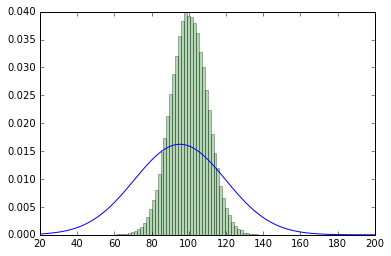

In [33]:
plt.hist(data, bins=50, normed=True, alpha=0.3, color='green')
my_norm = stats.norm(*opt['x'])
point = np.linspace(20, 200, 100)
plt.plot(point, my_norm.pdf(point))

**Demonstration: Trap of Local Extrema**

To understand the problem, we need to understand first how optimization are done, essentially. (Let's go to the attached file: grad_desc_animate.py)

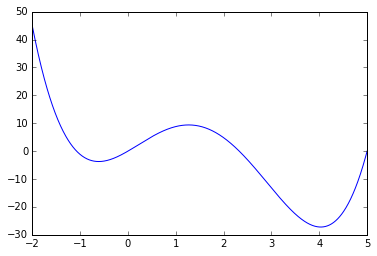

In [34]:
def test_func(x):
    return 0.8*x**4 - 5*x**3 + 3*x**2 + 10*x

point = np.linspace(-2, 5, 1000)
plt.plot(point, test_func(point))

In [35]:
bnd = [(-2, 5)]
print optimize.minimize(test_func, [0.0], bounds = bnd).x
print optimize.minimize(test_func, [-1.5], bounds = bnd).x
print '-'*70
print optimize.minimize(test_func, [2], bounds = bnd).x
print optimize.minimize(test_func, [4.5], bounds = bnd).x

[-0.61115287]
[-0.61115288]
----------------------------------------------------------------------
[ 4.02977671]
[ 4.02977691]


In [36]:
#### A (too) simple solution

trial = 30
bnds = [(0, None), (0, None)]
maxi = -np.infty

import time
start = time.time()


for i in range(trial):
    init = np.random.rand(2)*100
    opt = optimize.minimize(lambda x: -1*log_likelihood(x[0], x[1], data=data), init, bounds=bnds)
    if -opt.fun > maxi:
        maxi = -opt.fun
        para = opt['x']
        
        
print time.time() - start
print para
print maxi

16.5234689713
[ 100.01402139    9.95023828]
-371653.417224


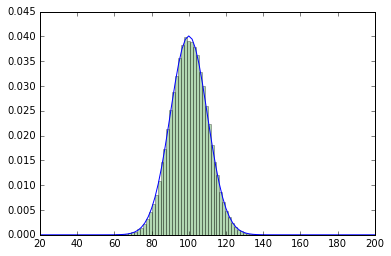

In [37]:
#### Let's check the result again

plt.hist(data, bins=50, normed=True, alpha=0.3, color='green')
my_norm = stats.norm(*para)
point = np.linspace(20, 200, 100)
plt.plot(point, my_norm.pdf(point))

Assume we have data:

$$
x_1, x_2, ..., x_n
$$

Then the log-likelihood function would be:

$$
\text{log_likelihood}(\mu, \sigma) = \sum_{i=0}^n log \Big( \frac{1}{\sqrt{2 \sigma^2 \pi}} \exp \big( \frac{-(x_i-\mu)^2 }{ 2 \sigma^2 } \big) \Big)\\
= \sum_{i=0}^n -\frac{1}{2} log( 2 \sigma^2 \pi ) - \frac{ (x_i- \mu)^2 }{ 2 \sigma^2 }\\
= \sum_{i=0}^n -\frac{1}{2} log(2) + 2log(\sigma) + log(\pi) - \frac{ (x_i- \mu)^2 }{ 2 \sigma^2 }\\
\approx \sum_{i=0}^n - log( \sigma^2 ) - \frac{ (x_i- \mu)^2 }{ 2 \sigma^2 }
$$

To maximize the log likelihood function, let's differentiate it with respect to $\mu$ and $\sigma$. Therefore:

$$
\frac{d \text{ log_likelihood}}{d \mu} = \frac{d}{d \mu} \frac{ \sum_{i=0}^n (x_i- \mu)^2 }{ 2 \sigma^2 } \\
= \sum_{i=0}^n \frac{(x_i - \mu)}{ \sigma^2 }
$$

The maximum happens at where the first derivative equal to zero, so

$$
\sum_{i=0}^nx_i - n \mu = 0
$$

and therefore

$$
\mu = \frac{ \sum_{i=0}^nx_i }{n}
$$

Similarly for $\sigma$, we differentiate:

$$
\frac{d \text{ log_likelihood}}{d \sigma} = \frac{d}{d \sigma} \Big( -n log( \sigma ) - \frac{ \sum_{i=0}^n (x_i- \mu)^2 }{ 2 \sigma^2 } \Big) \\
= \frac{-n}{\sigma} +\sum_{i=0}^n (x_i - \mu)^2 \sigma^{-3}
$$

Again since the first derivative should be zero,

$$
\frac{-n}{\sigma} + \sum_{i=0}^n (x_i - \mu)^2 \sigma^{-3} = 0
$$

so

$$
\sum_{i=0}^n (x_i - \mu)^2 \sigma^{-3} = \frac{n}{\sigma}
$$

and finally

$$
\frac{\sum_{i=0}^n (x_i - \mu)^2}{n}  = \sigma^2
$$